In [ ]:
pip install wordcloud

In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 57.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Importar librerías necesarias
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.util import ngrams
from collections import Counter
import re
from wordcloud import WordCloud

# Descargar recursos de NLTK (si es necesario)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
  import nltk
  nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Cargar modelo de spaCy (puedes necesitar descargar el modelo deseado)
nlp = spacy.load("es_core_news_sm")

# Ejemplo de texto para análisis
texto = "Emilia Pérez' es ambiciosa y magnífica hasta lo insultante; abarca el musical, el melodrama, la intriga, el thriller y trata un asunto tan complejo como el de la transexualidad desde perspectivas insólitas."


In [ ]:

# 1. Preprocesamiento de texto mejorado
def preprocesar_texto(texto):
    """
    Función para preprocesar texto:
    - Eliminación de puntuación
    - Tokenización
    - Eliminación de stopwords
    - Lematización
    - Normalización de texto
    """
    # Eliminar puntuación
    texto = re.sub(r'[^\w\s]', '', texto)
    # Tokenización
    tokens = nltk.word_tokenize(texto.lower())
    # Stopwords
    stopwords = nltk.corpus.stopwords.words('spanish')
    tokens_filtrados = [token for token in tokens if token.isalnum() and token not in stopwords]
    # Lematización
    doc = nlp(" ".join(tokens_filtrados))
    lemas = [token.lemma_ for token in doc]
    # Normalización de texto (eliminar espacios extras)
    texto_normalizado = " ".join(lemas)
    return texto_normalizado.split()

texto_preprocesado = preprocesar_texto(texto)
print("Texto preprocesado:", texto_preprocesado)



Texto preprocesado: ['emilia', 'pérez', 'ambicioso', 'magnífico', 'insultante', 'abarca', 'musical', 'melodrama', 'intrigo', 'thriller', 'tratar', 'asunto', 'tanto', 'complejo', 'transexualidad', 'perspectiva', 'insólito']


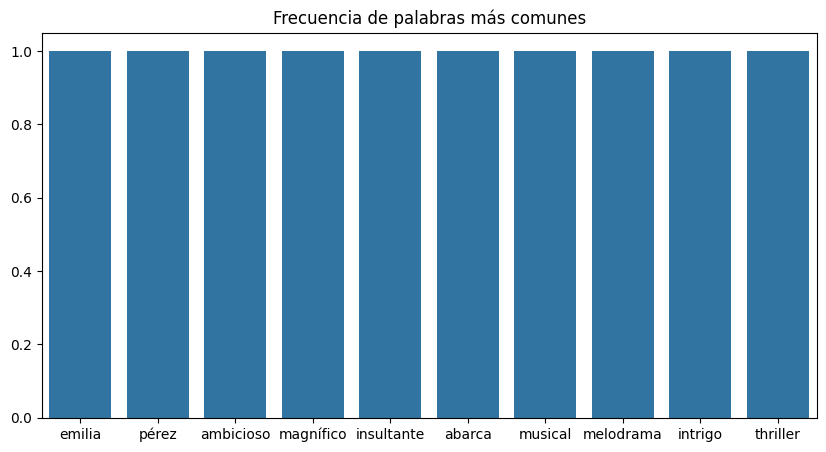

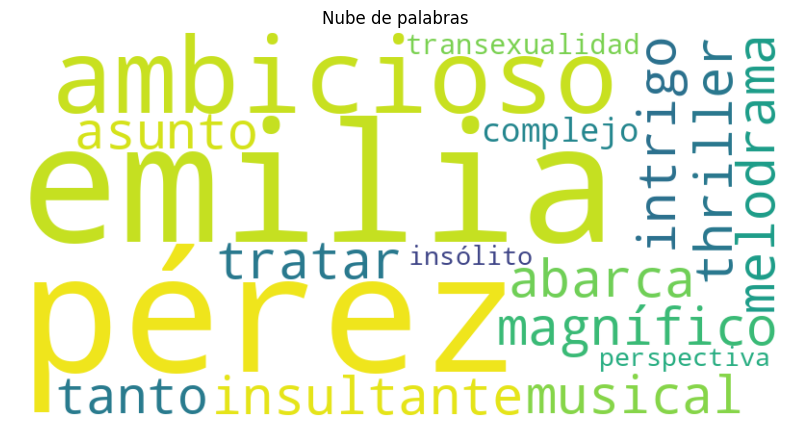

In [ ]:
# 2. Visualizaciones
def visualizar_frecuencia_palabras(texto_preprocesado, n=10):
    """
    Función para visualizar la frecuencia de las palabras más comunes.
    """
    frecuencia_palabras = Counter(texto_preprocesado)
    palabras_comunes = frecuencia_palabras.most_common(n)
    palabras, frecuencias = zip(*palabras_comunes)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(palabras), y=list(frecuencias))
    plt.title("Frecuencia de palabras más comunes")
    plt.show()

visualizar_frecuencia_palabras(texto_preprocesado)

def visualizar_nube_palabras(texto_preprocesado):
    """
    Función para visualizar una nube de palabras.
    """
    texto_completo = " ".join(texto_preprocesado)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Nube de palabras")
    plt.show()

visualizar_nube_palabras(texto_preprocesado)


In [ ]:

# 3. N-gramas
def obtener_ngrams(texto_preprocesado, n=2):
    """
    Función para obtener n-gramas de un texto.
    """
    ngrams_lista = list(ngrams(texto_preprocesado, n))
    return ngrams_lista

bigramas = obtener_ngrams(texto_preprocesado, 2)
print("Bigramas:", bigramas)


Bigramas: [('emilia', 'pérez'), ('pérez', 'ambicioso'), ('ambicioso', 'magnífico'), ('magnífico', 'insultante'), ('insultante', 'abarca'), ('abarca', 'musical'), ('musical', 'melodrama'), ('melodrama', 'intrigo'), ('intrigo', 'thriller'), ('thriller', 'tratar'), ('tratar', 'asunto'), ('asunto', 'tanto'), ('tanto', 'complejo'), ('complejo', 'transexualidad'), ('transexualidad', 'perspectiva'), ('perspectiva', 'insólito')]


In [ ]:

# 4. Análisis de sentimiento
def analizar_sentimiento(texto):
    """
    Función para analizar el sentimiento de un texto.
    """
    sia = SentimentIntensityAnalyzer()
    sentimiento = sia.polarity_scores(texto)
    return sentimiento

sentimiento = analizar_sentimiento(texto)
print("Análisis de sentimiento:", sentimiento)

Análisis de sentimiento: {'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'compound': 0.1027}
